# TimML Notebook 0 - Tracing metadata version

This notebook is largely identical to Notebook 0, but takes advantage of the tracing metadata.

## Single layer flow

Consider uniform flow from East to West. The gradient is 0.001. The hydraulic conductivity is $k=10$ m/d. The aquifer bottom and top are at 0 m and 10 m. The head at $x=-1000$ m and $y=0$ is fixed at 41 m. 

In [1]:
%matplotlib inline
from timml import *
from pylab import *

In [2]:
ml = ModelMaq(kaq=10, z=[10, 0])

In [3]:
rf = Constant(ml, xr=-1000, yr=0, hr=41)

In [4]:
uf = Uflow(ml, slope=0.001, angle=0)

In [5]:
ml.solve()

Number of elements, Number of equations: 2 , 1
..
solution complete


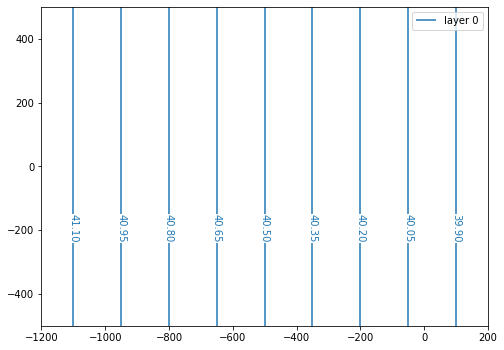

In [6]:
ml.contour(win=[-1200, 200, -500, 500], ngr=50,
           levels=10, labels=True, decimals=2, legend=True, figsize=(8, 8))

The default contour levels are not what we want for this example, so let's specify the levels 
to go from 39 to 42 with steps of 0.1 (not all those levels are present in the current window).

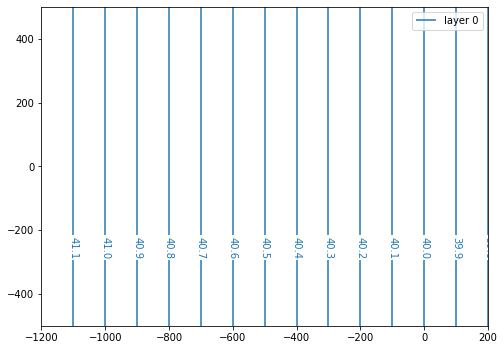

In [7]:
ml.contour(win=[-1200, 200, -500, 500], ngr=50,
           levels=arange(39, 42, 0.1), labels=True, decimals=1, figsize=(8, 8))

A well is located at $(x,y)=(-400,0)$ with a discharge $Q=50$ m$^3$/d and a radius of 0.2 m.

In [8]:
w = Well(ml, xw=-400, yw=0, Qw=50., rw=0.2, label='Well')

After the well is added (or any other elements), the model needs to be solved again. A contour plot is created and a 10 strace line are added. The stepsize is given in meters and represents the largest space step that is taken, but it is reduced when certain accuracy constraints are not met. 

Using the `return_traces` argument, the constructed trace is returned. For now the default is to return a list of tuples with the trace and layerlist.

Number of elements, Number of equations: 3 , 1
...
solution complete
.


q:\teams\samenwerkingsverbanden\sv_000481\01_packages\python\timml\timml\util.py:267: FutureWarning: In a future version traces will be returned as a dictionary containing metadata together with the trace. To already get the new behaviour use metadata=True.
  metadata=metadata,


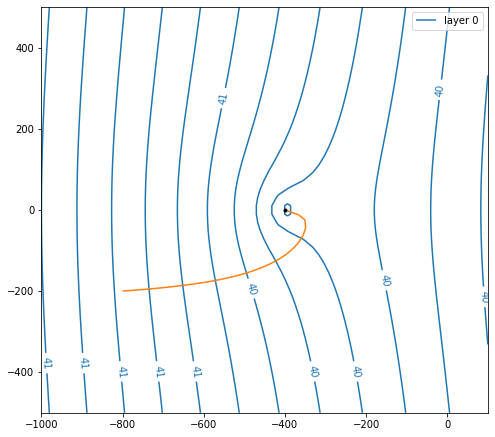

In [9]:
ml.solve()
ml.contour(win=[-1000, 100, -500, 500], ngr=50, levels=np.arange(39, 42, 0.1), figsize=(8, 8))
trace = ml.tracelines(-800 * ones(1), -200 * ones(1), zeros(1), hstepmax=20, color='C1', return_traces=True)
# print(
#     '{m} in {t:.1f} days (steps: {s}, trace complete: {c})'.format(
#         m=trace[0]['message'], t=trace[0]['trace'][-1,3], s=trace[0]['trace'].shape[0]-1, c=trace[0]['complete']
#     )
# )

As explained by the FutureWarning, in the future the returned trace will change to a dictionary that contains the following information:

- `trace`: a `numpy.array` with shape (nsteps, 4) containing the (x,y,z,t) coordinates of each point on the trace, where t is the traveltime from the start of the trace.
- `message`: a string describing why the trace ended. This contains the name of the element if a `label` was provided.
- `complete`: a boolean describing whether the trace terminated normaly (True) or was terminated because the maximum number of iterations was reached (False)
- `layers`: a list with the layer indices for each segment of the trace. This is mainly used for plotting.

To get the new behaviour, we have to explicitly set `metadata=True`, which allows us to get some more information on the status of the trace:

Number of elements, Number of equations: 3 , 1
...
solution complete
.
reached element of type well (Well) in 15127.8 days (steps: 28, trace complete: True)


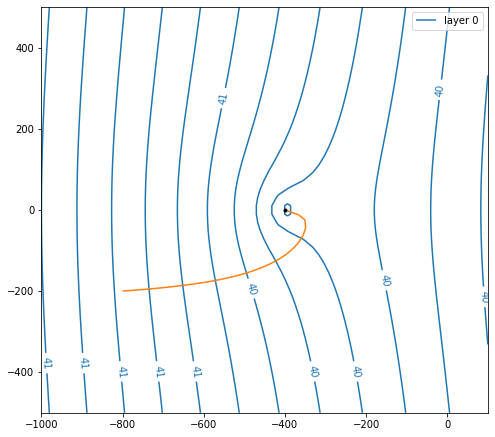

In [10]:
ml.solve()
ml.contour(win=[-1000, 100, -500, 500], ngr=50, levels=np.arange(39, 42, 0.1), figsize=(8, 8))
trace = ml.tracelines(-800 * ones(1), -200 * ones(1), zeros(1), hstepmax=20, color='C1', return_traces=True, metadata=True)
print(
    '{m} in {t:.1f} days (steps: {s}, trace complete: {c})'.format(
        m=trace[0]['message'], t=trace[0]['trace'][-1,3], s=trace[0]['trace'].shape[0]-1, c=trace[0]['complete']
    )
)

Similarly, we can demonstrate the effect of a low maximum number of iterations (note the trace contains 6 points because it includes the starting point):

Number of elements, Number of equations: 3 , 1
...
solution complete
.

reached nstepmax iterations in 2548.3 days (steps: 5, trace complete: False)


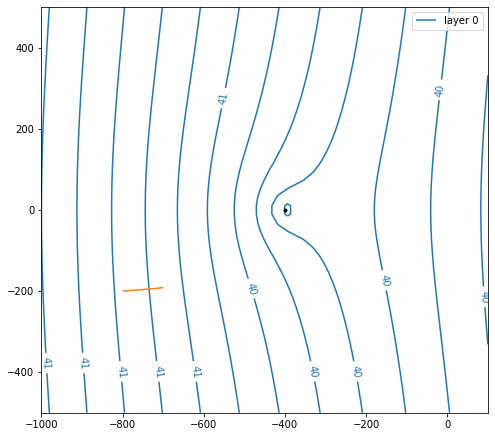

In [11]:
ml.solve()
ml.contour(win=[-1000, 100, -500, 500], ngr=50, levels=np.arange(39, 42, 0.1), figsize=(8, 8))
trace = ml.tracelines(-800 * ones(1), -200 * ones(1), zeros(1), hstepmax=20, color='C1', return_traces=True, metadata=True, nstepmax=5)
print()
print(
    '{m} in {t:.1f} days (steps: {s}, trace complete: {c})'.format(
        m=trace[0]['message'], t=trace[0]['trace'][-1,3], s=trace[0]['trace'].shape[0]-1, c=trace[0]['complete']
    )
)

Next we demonstrate the effect of a low maximum travel time, note that this trace is reported complete because it encountered a regular termination condition:

Number of elements, Number of equations: 3 , 1
...
solution complete
.

reached tmax in 5000.0 days (steps: 10, trace complete: True)


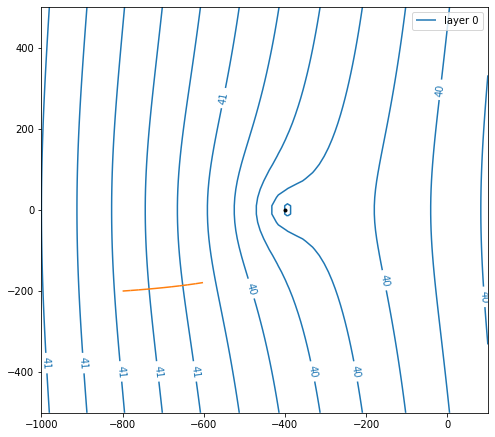

In [12]:
ml.solve()
ml.contour(win=[-1000, 100, -500, 500], ngr=50, levels=np.arange(39, 42, 0.1), figsize=(8, 8))
trace = ml.tracelines(-800 * ones(1), -200 * ones(1), zeros(1), hstepmax=20, color='C1', return_traces=True, metadata=True, tmax=5000)
print()
print(
    '{m} in {t:.1f} days (steps: {s}, trace complete: {c})'.format(
        m=trace[0]['message'], t=trace[0]['trace'][-1,3], s=trace[0]['trace'].shape[0]-1, c=trace[0]['complete']
    )
)
# print('The travel time to the well is', int(trace[0]['trace'][-1, 3]), 'days')

Finally, show whether the trace travels more than 100m in the X or Y direction within 10 years. Use the `win` argument to the `tracelines` method to specify the tracing window:

Number of elements, Number of equations: 3 , 1
...
solution complete
.

reached window boundary in 2557.1 days (steps: 6, trace complete: True)


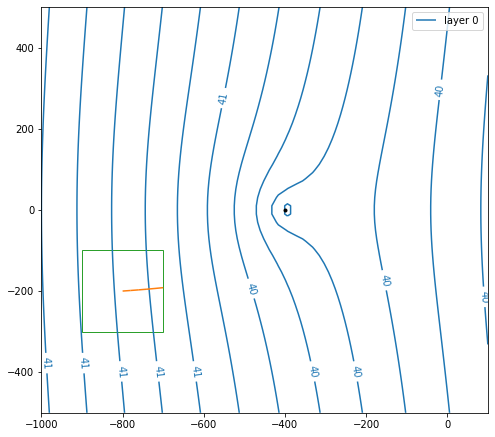

In [13]:
ml.solve()
ml.contour(win=[-1000, 100, -500, 500], ngr=50, levels=np.arange(39, 42, 0.1), figsize=(8, 8))
trace = ml.tracelines(-800 * ones(1), -200 * ones(1), zeros(1), hstepmax=20, color='C1', return_traces=True, metadata=True, tmax=365*10, win=[-900, -700, -300, -100])
ax = gca()
ax.add_patch(Rectangle((-900, -300), 200, 200, fill=False, color='C2'))
print()
print(
    '{m} in {t:.1f} days (steps: {s}, trace complete: {c})'.format(
        m=trace[0]['message'], t=trace[0]['trace'][-1,3], s=trace[0]['trace'].shape[0]-1, c=trace[0]['complete']
    )
)
# print('The travel time to the well is', int(trace[0]['trace'][-1, 3]), 'days')

### Exercise a
Draw 10 tracelines from $x=-800$ and different values of $y$.

..........

reached nstepmax iterations in 62852.8 days (steps: 100, trace complete: False)
reached nstepmax iterations in 63527.0 days (steps: 100, trace complete: False)
reached nstepmax iterations in 64949.3 days (steps: 100, trace complete: False)
reached element of type well (Well) in 11202.3 days (steps: 24, trace complete: True)
reached element of type well (Well) in 8065.5 days (steps: 20, trace complete: True)
reached element of type well (Well) in 8065.5 days (steps: 20, trace complete: True)
reached element of type well (Well) in 11202.3 days (steps: 24, trace complete: True)
reached nstepmax iterations in 64949.3 days (steps: 100, trace complete: False)
reached nstepmax iterations in 63527.0 days (steps: 100, trace complete: False)
reached nstepmax iterations in 62852.8 days (steps: 100, trace complete: False)


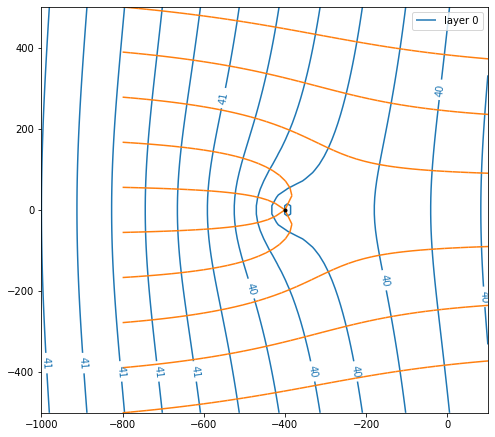

In [14]:
ml.contour(win=[-1000, 100, -500, 500], ngr=50, levels=np.arange(39, 42, 0.1), figsize=(8, 8))
traces = ml.tracelines(-800 * ones(10), linspace(-500, 500, 10), zeros(10), hstepmax=20, color='C1', return_traces=True, metadata=True)
print()
for trace in traces:
    print(
        '{m} in {t:.1f} days (steps: {s}, trace complete: {c})'.format(
            m=trace['message'], t=trace['trace'][-1,3], s=trace['trace'].shape[0]-1, c=trace['complete']
        )
    )


We can also calculate the mean travel time to the well from these traces:

In [15]:
mean_travel_time = np.mean([trace['trace'][-1,3] for trace in traces if trace['message'] == 'reached element of type well (Well)'])
print('The mean travel time to the well is {0:.1f} days'.format(mean_travel_time))

The mean travel time to the well is 9633.9 days


### Exercise b
Quadruple the discharge of the well and reproduce the same figure

Number of elements, Number of equations: 3 , 1
...
solution complete
..........
('head at well:', array([37.85129405]))
reached element of type well (Well) in 14141.3 days (steps: 40, trace complete: True)
reached element of type well (Well) in 9447.1 days (steps: 32, trace complete: True)
reached element of type well (Well) in 6721.8 days (steps: 26, trace complete: True)
reached element of type well (Well) in 5077.1 days (steps: 23, trace complete: True)
reached element of type well (Well) in 4332.3 days (steps: 21, trace complete: True)
reached element of type well (Well) in 4332.3 days (steps: 21, trace complete: True)
reached element of type well (Well) in 5077.1 days (steps: 23, trace complete: True)
reached element of type well (Well) in 6721.8 days (steps: 26, trace complete: True)
reached element of type well (Well) in 9447.1 days (steps: 32, trace complete: True)
reached element of type well (Well) in 14141.3 days (steps: 40, trace complete: True)


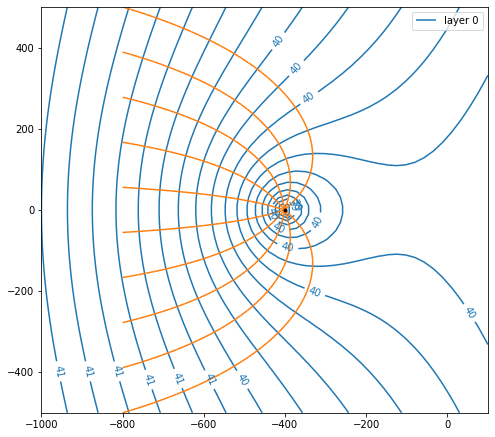

In [16]:
ml = ModelMaq(kaq=10, z=[10, 0])
rf = Constant(ml, xr=-1000, yr=0, hr=41)
uf = Uflow(ml, slope=0.001, angle=0)
w = Well(ml, xw=-400, yw=0, Qw=200, rw=0.2, label='Well')
ml.solve()
ml.contour(win=[-1000, 100, -500, 500], ngr=50, levels=np.arange(39, 42, 0.1), figsize=(8, 8))
traces = ml.tracelines(-800 * ones(10), linspace(-500, 500, 10), zeros(10), hstepmax=20, color='C1', return_traces=True, metadata=True)
print(('head at well:', w.headinside()))

for trace in traces:
    print(
        '{m} in {t:.1f} days (steps: {s}, trace complete: {c})'.format(
            m=trace['message'], t=trace['trace'][-1,3], s=trace['trace'].shape[0], c=trace['complete']
        )
    )


### Add a river
A river runs along $x=0$. The water level in the river is at 40 m.

Number of elements, Number of equations: 4 , 2
....
solution complete
('head at well:', array([37.9150488]))
..........
.....
..........
reached element of type well in 14617.5 days (steps: 39, trace complete: True)
reached element of type well in 9901.0 days (steps: 31, trace complete: True)
reached element of type well in 7021.2 days (steps: 26, trace complete: True)
reached element of type well in 5312.9 days (steps: 23, trace complete: True)
reached element of type well in 4535.4 days (steps: 21, trace complete: True)
reached element of type well in 4535.4 days (steps: 21, trace complete: True)
reached element of type well in 5312.9 days (steps: 23, trace complete: True)
reached element of type well in 7021.2 days (steps: 26, trace complete: True)
reached element of type well in 9901.0 days (steps: 31, trace complete: True)
reached element of type well in 14617.5 days (steps: 39, trace complete: True)
reached nstepmax iterations in 74193.3 days (steps: 102, trace complete: False)
r

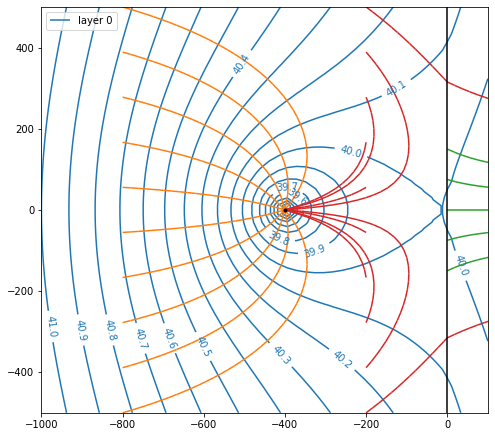

In [17]:
ml = ModelMaq(kaq=10, z=[10, 0])
rf = Constant(ml, xr=-1000, yr=0, hr=41)
uf = Uflow(ml, slope=0.001, angle=0)
w = Well(ml, xw=-400, yw=0, Qw=200, rw=0.2)
ls1 = HeadLineSink(ml, 0, -800, 0, 800, 40, label='River')
ml.solve()
ml.contour(win=[-1000, 100, -500, 500], ngr=50, levels=arange(39, 42, 0.1), decimals=1, figsize=(8, 8))
print(('head at well:', w.headinside()))
traces_field = ml.tracelines(-800 * ones(10), linspace(-500, 500, 10), zeros(10), hstepmax=20, color='C1', return_traces=True, metadata=True)
traces_river = ml.tracelines(-0.01 * ones(5), linspace(-150, 150, 5), zeros(5), hstepmax=20, color='C2', return_traces=True, metadata=True)
traces_field_2 = ml.tracelines(-200*ones(10), linspace(-500, 500, 10), 10*ones(10), hstepmax=20, color='C3', return_traces=True, metadata=True)
for trace in traces_field+traces_river+traces_field_2:
    print(
        '{m} in {t:.1f} days (steps: {s}, trace complete: {c})'.format(
            m=trace['message'], t=trace['trace'][-1,3], s=trace['trace'].shape[0], c=trace['complete']
        )
    )


### Exercise c
Simulate the river with 20 line-sinks from $y=-800$ to $y=800$. 

Number of elements, Number of equations: 4 , 21
....
solution complete
..........
.....
..........


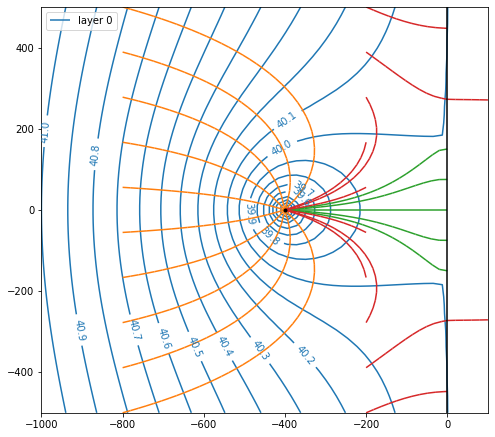

In [18]:
ml = ModelMaq(kaq=10, z=[10, 0])
rf = Constant(ml, xr=-1000, yr=0, hr=41)
uf = Uflow(ml, slope=0.001, angle=0)
w = Well(ml, xw=-400, yw=0, Qw=200, rw=0.2)
xls = zeros(21)
yls = linspace(-800, 800, 21)
ls = HeadLineSinkString(ml, xy=list(zip(xls, yls)), hls=40, layers=0)
ml.solve()
ml.contour(win=[-1000, 100, -500, 500], ngr=50, levels=arange(39, 42, 0.1), decimals=1, figsize=(8, 8))
traces_field = ml.tracelines(-800 * ones(10), linspace(-500, 500, 10), zeros(10), hstepmax=20, color='C1', return_traces=True, metadata=True)
traces_river = ml.tracelines(-0.01 * ones(5), linspace(-150, 150, 5), zeros(5), hstepmax=20, color='C2', return_traces=True, metadata=True)
traces_field_2 = ml.tracelines(-200*ones(10), linspace(-500, 500, 10), 10*ones(10), hstepmax=20, color='C3', return_traces=True, metadata=True)

In [19]:
for trace in traces_field+traces_river+traces_field_2:
    print(
        '{m} in {t:.1f} days (steps: {s}, trace complete: {c})'.format(
            m=trace['message'], t=trace['trace'][-1,3], s=trace['trace'].shape[0], c=trace['complete']
        )
    )


reached element of type well in 15205.2 days (steps: 40, trace complete: True)
reached element of type well in 9850.9 days (steps: 32, trace complete: True)
reached element of type well in 6921.5 days (steps: 26, trace complete: True)
reached element of type well in 5197.2 days (steps: 23, trace complete: True)
reached element of type well in 4424.0 days (steps: 21, trace complete: True)
reached element of type well in 4424.0 days (steps: 21, trace complete: True)
reached element of type well in 5197.2 days (steps: 23, trace complete: True)
reached element of type well in 6921.5 days (steps: 26, trace complete: True)
reached element of type well in 9850.9 days (steps: 32, trace complete: True)
reached element of type well in 15205.2 days (steps: 40, trace complete: True)
reached element of type well in 31766.0 days (steps: 22, trace complete: True)
reached element of type well in 20519.1 days (steps: 21, trace complete: True)
reached element of type well in 18335.9 days (steps: 20, tra

### Capture zone
Create a five year capture zone. You may want to create a contour plot first.

....................


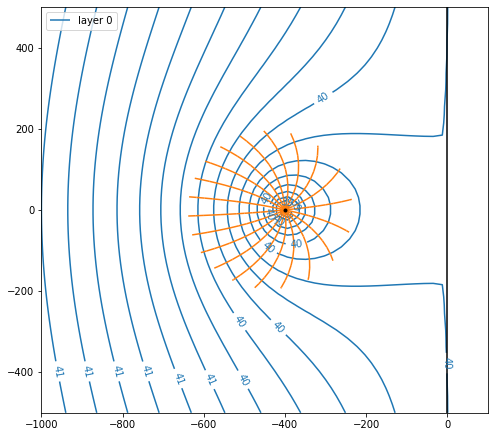

In [20]:
ml.contour(win=[-1000, 100, -500, 500], ngr=50, levels=arange(39, 42, 0.1), layers=0, figsize=(8, 8))
traces = w.plotcapzone(hstepmax=20, nt=20, zstart=0, tmax=5 * 365.25, color='C1', return_traces=True, metadata=True)

In [21]:
for trace in traces:
    print(
        '{m} at {d:.1f} m from the well (steps: {s}, trace complete: {c})'.format(
            m=trace['message'], d=np.linalg.norm(trace['trace'][0, :3]-trace['trace'][-1, :3]), s=trace['trace'].shape[0], c=trace['complete']
        )
    )


reached tmax at 166.4 m from the well (steps: 10, trace complete: True)
reached tmax at 169.6 m from the well (steps: 10, trace complete: True)
reached tmax at 177.6 m from the well (steps: 11, trace complete: True)
reached tmax at 188.9 m from the well (steps: 11, trace complete: True)
reached tmax at 201.2 m from the well (steps: 12, trace complete: True)
reached tmax at 212.9 m from the well (steps: 13, trace complete: True)
reached tmax at 222.5 m from the well (steps: 13, trace complete: True)
reached tmax at 230.0 m from the well (steps: 13, trace complete: True)
reached tmax at 235.2 m from the well (steps: 13, trace complete: True)
reached tmax at 238.1 m from the well (steps: 13, trace complete: True)
reached tmax at 238.5 m from the well (steps: 13, trace complete: True)
reached tmax at 236.6 m from the well (steps: 13, trace complete: True)
reached tmax at 232.2 m from the well (steps: 13, trace complete: True)
reached tmax at 225.5 m from the well (steps: 13, trace complete

### Exercise d
Create a 20 year capture zone using 20 tracelines.

....................
reached tmax at 283.3 m from the well (steps: 16, trace complete: True)
reached tmax at 298.4 m from the well (steps: 19, trace complete: True)
reached tmax at 358.7 m from the well (steps: 23, trace complete: True)
reached tmax at 418.7 m from the well (steps: 26, trace complete: True)
reached tmax at 465.2 m from the well (steps: 27, trace complete: True)
reached tmax at 500.1 m from the well (steps: 28, trace complete: True)
reached tmax at 526.1 m from the well (steps: 29, trace complete: True)
reached tmax at 544.7 m from the well (steps: 29, trace complete: True)
reached tmax at 557.0 m from the well (steps: 30, trace complete: True)
reached tmax at 563.5 m from the well (steps: 30, trace complete: True)
reached tmax at 564.4 m from the well (steps: 30, trace complete: True)
reached tmax at 560.0 m from the well (steps: 30, trace complete: True)
reached tmax at 549.9 m from the well (steps: 29, trace complete: True)
reached tmax at 533.6 m from the well (step

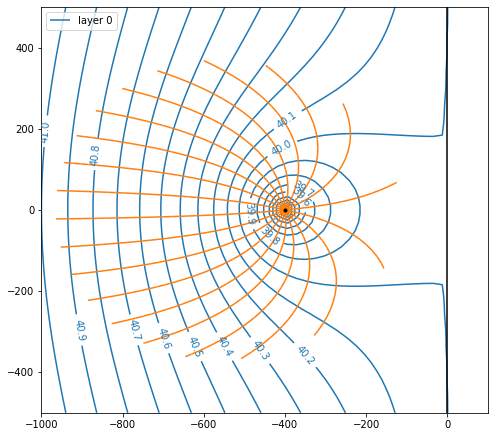

In [22]:
ml.contour(win=[-1000, 100, -500, 500], ngr=50, levels=arange(39, 42, 0.1), decimals=1, layers=0, figsize=(8, 8))
traces = w.plotcapzone(hstepmax=20, nt=20, zstart=0, tmax=20 * 365.25, color='C1', return_traces=True, metadata=True)
for trace in traces:
    print(
        '{m} at {d:.1f} m from the well (steps: {s}, trace complete: {c})'.format(
            m=trace['message'], d=np.linalg.norm(trace['trace'][0, :3]-trace['trace'][-1, :3]), s=trace['trace'].shape[0], c=trace['complete']
        )
    )